In [2]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)
library(NatParksPalettes)
library(readr)

ERROR: Error in library(compositions): there is no package called ‘compositions’


# WORKS BEST!! trying a different correlation method

In [38]:
master <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv")
head(master)

X baseMean  log2FoldChange lfcSE     stat       pvalue       padj     
1 1 1.4553376 -1.58887408    0.3911621 -4.0619325 4.866815e-05 0.3688559
2 2 0.3984625  0.41653866    0.5699233  0.7308679 4.648598e-01 0.9968973
3 3 1.6559504  0.25216783    0.3641720  0.6924415 4.886601e-01 0.9968973
4 4 1.2866563 -0.97078515    0.5119361 -1.8963013 5.792021e-02 0.9968973
5 5 2.7154615 -0.05010603    0.2936791 -0.1706149 8.645266e-01 0.9968973
6 6 1.1378577 -0.29946048    0.4050389 -0.7393377 4.597020e-01 0.9968973
  contrast          Direction gene       celltype sex   
1 cohort.cohortGuid BR1       CCDC174    ASDC     Female
2 cohort.cohortGuid BR2       AL669831.5 ASDC     Female
3 cohort.cohortGuid BR2       NOC2L      ASDC     Female
4 cohort.cohortGuid BR1       ISG15      ASDC     Female
5 cohort.cohortGuid BR1       SDF4       ASDC     Female
6 cohort.cohortGuid BR1       B3GALT6    ASDC     Female

In [39]:
# # Create a new data frame with rows containing NA values in either column
# rows_with_na <- master[!complete.cases(master), ]

# print("Subset of rows with NA values in either column:")
# print(rows_with_na)

In [40]:
# female DEGs
master_female <- master %>% filter(master$sex == 'Female')
head(master_female)

X baseMean  log2FoldChange lfcSE     stat       pvalue       padj     
1 1 1.4553376 -1.58887408    0.3911621 -4.0619325 4.866815e-05 0.3688559
2 2 0.3984625  0.41653866    0.5699233  0.7308679 4.648598e-01 0.9968973
3 3 1.6559504  0.25216783    0.3641720  0.6924415 4.886601e-01 0.9968973
4 4 1.2866563 -0.97078515    0.5119361 -1.8963013 5.792021e-02 0.9968973
5 5 2.7154615 -0.05010603    0.2936791 -0.1706149 8.645266e-01 0.9968973
6 6 1.1378577 -0.29946048    0.4050389 -0.7393377 4.597020e-01 0.9968973
  contrast          Direction gene       celltype sex   
1 cohort.cohortGuid BR1       CCDC174    ASDC     Female
2 cohort.cohortGuid BR2       AL669831.5 ASDC     Female
3 cohort.cohortGuid BR2       NOC2L      ASDC     Female
4 cohort.cohortGuid BR1       ISG15      ASDC     Female
5 cohort.cohortGuid BR1       SDF4       ASDC     Female
6 cohort.cohortGuid BR1       B3GALT6    ASDC     Female

In [41]:
library(tidyr)

# Assuming your DataFrame is named 'df'
df_wide_female <- master_female %>%
  pivot_wider(names_from = sex,
              values_from = log2FoldChange)
head(df_wide_female)

X baseMean  lfcSE     stat       pvalue       padj      contrast         
1 1 1.4553376 0.3911621 -4.0619325 4.866815e-05 0.3688559 cohort.cohortGuid
2 2 0.3984625 0.5699233  0.7308679 4.648598e-01 0.9968973 cohort.cohortGuid
3 3 1.6559504 0.3641720  0.6924415 4.886601e-01 0.9968973 cohort.cohortGuid
4 4 1.2866563 0.5119361 -1.8963013 5.792021e-02 0.9968973 cohort.cohortGuid
5 5 2.7154615 0.2936791 -0.1706149 8.645266e-01 0.9968973 cohort.cohortGuid
6 6 1.1378577 0.4050389 -0.7393377 4.597020e-01 0.9968973 cohort.cohortGuid
  Direction gene       celltype Female     
1 BR1       CCDC174    ASDC     -1.58887408
2 BR2       AL669831.5 ASDC      0.41653866
3 BR2       NOC2L      ASDC      0.25216783
4 BR1       ISG15      ASDC     -0.97078515
5 BR1       SDF4       ASDC     -0.05010603
6 BR1       B3GALT6    ASDC     -0.29946048

In [42]:
# Male DEGs
master_male <- master %>% filter(master$sex == 'Male')
head(master_male)

X baseMean  log2FoldChange lfcSE     stat       pvalue    padj     
1 1 0.4321027 -0.33851016    0.6221762 -0.5440744 0.5863902 0.9967281
2 2 2.1306270 -0.21090779    0.3400806 -0.6201701 0.5351458 0.9967281
3 3 1.1454997 -0.39546356    0.5239595 -0.7547598 0.4503931 0.9967281
4 4 2.8187800  0.08086743    0.2866310  0.2821308 0.7778433 0.9967281
5 5 0.6591821 -0.77420752    0.5535811 -1.3985439 0.1619498 0.9967281
6 6 1.9946145 -0.09223559    0.3068931 -0.3005463 0.7637605 0.9967281
  contrast          Direction gene       celltype sex 
1 cohort.cohortGuid BR1       AL669831.5 ASDC     Male
2 cohort.cohortGuid BR1       NOC2L      ASDC     Male
3 cohort.cohortGuid BR1       ISG15      ASDC     Male
4 cohort.cohortGuid BR2       SDF4       ASDC     Male
5 cohort.cohortGuid BR1       B3GALT6    ASDC     Male
6 cohort.cohortGuid BR1       UBE2J2     ASDC     Male

In [43]:
library(tidyr)

# Assuming your DataFrame is named 'df'
df_wide_male <- master_male %>%
  pivot_wider(names_from = sex,
              values_from = log2FoldChange)
head(df_wide_male)

X baseMean  lfcSE     stat       pvalue    padj      contrast         
1 1 0.4321027 0.6221762 -0.5440744 0.5863902 0.9967281 cohort.cohortGuid
2 2 2.1306270 0.3400806 -0.6201701 0.5351458 0.9967281 cohort.cohortGuid
3 3 1.1454997 0.5239595 -0.7547598 0.4503931 0.9967281 cohort.cohortGuid
4 4 2.8187800 0.2866310  0.2821308 0.7778433 0.9967281 cohort.cohortGuid
5 5 0.6591821 0.5535811 -1.3985439 0.1619498 0.9967281 cohort.cohortGuid
6 6 1.9946145 0.3068931 -0.3005463 0.7637605 0.9967281 cohort.cohortGuid
  Direction gene       celltype Male       
1 BR1       AL669831.5 ASDC     -0.33851016
2 BR1       NOC2L      ASDC     -0.21090779
3 BR1       ISG15      ASDC     -0.39546356
4 BR2       SDF4       ASDC      0.08086743
5 BR1       B3GALT6    ASDC     -0.77420752
6 BR1       UBE2J2     ASDC     -0.09223559

In [44]:
dim(df_wide_female)
dim(df_wide_male)

[1] 373942     11

[1] 373942     11

In [45]:
merged_df <- merge(df_wide_female, df_wide_male, by = c("gene", "celltype" ))

In [46]:
dim(merged_df)

[1] 373942     20

In [47]:
head(merged_df)
length(unique(merged_df$celltype))

gene celltype                X.x   baseMean.x lfcSE.x   stat.x       
1 A1BG Activated memory B cell 12604  0.8745860 0.6111199  0.3772238960
2 A1BG ASDC                     6886  2.9808534 0.3008563 -0.8779399767
3 A1BG BaEoMaP cell            25295  0.4842142 0.9885889  0.1194562467
4 A1BG C1Q+ CD16 monocyte      32318  9.2218595 0.2137578 -0.2160191133
5 A1BG CD14+ cDC2              54435 45.9265288 0.1157049  0.0003902326
6 A1BG CD27- effector B cell   60560  6.0352749 0.2090550 -2.0586681747
  pvalue.x   padj.x    contrast.x        Direction.x Female        X.y   
1 0.70600722 0.9993825 cohort.cohortGuid BR2          2.305290e-01 364690
2 0.37997629 0.9968973 cohort.cohortGuid BR1         -2.641337e-01   7224
3 0.90491390 0.9999824 cohort.cohortGuid BR2          1.180931e-01  20058
4 0.82897285 0.9997166 cohort.cohortGuid BR1         -4.617577e-02  23826
5 0.99968864 0.9996886 cohort.cohortGuid BR2          4.515182e-05  46242
6 0.03952604 0.8095421 cohort.cohortGuid BR1         -4.303748e-01  59054
  baseMean.y lfcSE.y   stat.y     pvalue.y  padj.y    contrast.y       
1  0.3611043 0.6846853  1.2280213 0.2194390 0.9996744 cohort.cohortGuid
2  2.8428643 0.2762140 -0.4260600 0.6700641 0.9967281 cohort.cohortGuid
3  0.9541177 0.9524278  0.1509376 0.8800249 0.9998365 cohort.cohortGuid
4  6.7892801 0.2134196  1.3859435 0.1657642 0.9897011 cohort.cohortGuid
5 49.9785284 0.1344458 -0.5556411 0.5784562 0.9920776 cohort.cohortGuid
6  5.1826150 0.2407529  1.3442986 0.1788519 0.9918464 cohort.cohortGuid
  Direction.y Male       
1 BR2          0.84080818
2 BR1         -0.11768372
3 BR2          0.14375718
4 BR2          0.29578752
5 BR1         -0.07470359
6 BR2          0.32364375

[1] 71

In [60]:
#checking one celltype

celltype_filter <- merged_df %>% 
    filter(celltype == 'Activated memory B cell') %>%
    select(gene, Female, Male)

# Remove rows with NA values
  celltype_filter <- na.omit(celltype_filter)   #<- the log2Fold change values are 'NA' for some genes 

 #Calculate Spearman correlation
  spearman_cor <- cor(celltype_filter$Female, celltype_filter$Male, method = "spearman")

celltype_filter
spearman_cor



gene        Female       Male        
1    A1BG         0.23052904   0.840808179
2    AAED1        0.86341241   0.271563359
3    AAMP         0.93704008   0.316172468
4    AASDHPPT     0.88400405   0.434771093
5    AATF         0.39196921   0.564690030
6    ABCB7        0.52186237   0.546348431
7    ABCE1       -0.44394885  -0.350273850
8    ABCF1       -0.25963919  -0.417911380
9    ABHD10       0.52161824  -0.422932085
10   ABHD13       0.34160424   1.116447136
11   ABHD14A     -0.03542629  -0.055027378
12   ABHD14B     -0.64715739   0.311107824
13   ABHD17A     -0.34691914   0.252723882
14   ABI1         0.26544774   0.244513434
15   ABLIM1      -0.32494313  -0.108312353
16   ABRACL       0.32458988   0.081150324
17   ABRAXAS1    -0.22472458   0.099402269
18   ABRAXAS2     0.67735339  -0.398455941
19   ABT1        -0.22727479  -0.164814925
20   ABTB1       -0.26914261  -0.353383775
21   AC004687.1  -0.08500759   0.346915915
22   AC005261.1   0.12637427   0.905932570
23   AC007384.1  -0.25158189   1.196159531
24   AC007952.4  -0.55119098  -0.172672131
25   AC008105.3  -0.03808450  -0.060284060
26   AC010642.2  -0.31559144   0.280958032
27   AC013394.1   0.39755229   0.138065870
28   AC016831.5  -0.46981428  -0.002331628
29   AC016831.7   0.72874014   0.362725563
30   AC025159.1   0.38089598  -0.001772061
⋮    ⋮           ⋮            ⋮           
5180 ZNF721      -0.065369623 -0.39999880 
5181 ZNF736       0.404578254  0.73788295 
5182 ZNF75A      -0.997203161  0.16732795 
5183 ZNF766       0.198315762  0.19207593 
5184 ZNF770       0.093956729  0.46143515 
5185 ZNF780B      1.196443561  0.56053315 
5186 ZNF787      -0.651212654 -0.18951202 
5187 ZNF791      -0.414133412 -0.09331786 
5188 ZNF800       0.329600657  0.27148401 
5189 ZNF814       0.217151743  0.73677809 
5190 ZNF83        0.195715069 -0.75633261 
5191 ZNF830      -0.276540242 -0.05596722 
5192 ZNF844       0.446725723  0.60631328 
5193 ZNF860      -0.598214279  0.25320689 
5194 ZNF880       0.753664494  0.48312860 
5195 ZNF91       -0.151065094  0.24307158 
5196 ZNF92       -0.009411543  0.48592314 
5197 ZNFX1       -0.067587036  0.76530108 
5198 ZNHIT1      -0.038273323  1.03111349 
5199 ZNHIT3      -0.709042125 -0.14279577 
5200 ZNHIT6       0.583325060  0.04746959 
5201 ZNRD1        0.244184511  0.54917863 
5202 ZNRF2        0.705918963 -0.29395704 
5203 ZPR1        -0.660383895  0.42030234 
5204 ZRANB1       0.286929893 -0.41049406 
5205 ZRANB2       0.265642182 -0.25363647 
5206 ZRSR2       -0.091509016  1.25851602 
5207 ZSCAN16-AS1  1.208154075 -0.28711794 
5208 ZSCAN18      0.357341850 -0.04592942 
5209 ZSWIM7       0.104668419 -0.16890124

[1] 0.04180377

## Generate Spearman table

In [49]:
library(dplyr)
library(ggplot2)

# Initialize an empty list to store results
correlation_list <- list()

for(cell in unique(merged_df$celltype)) {
  celltype_filter <- merged_df %>% 
    filter(celltype == cell) %>%
    select(gene, Female, Male)
  
  # Remove rows with NA values
  celltype_filter <- na.omit(celltype_filter)

  # Calculate Spearman correlation
  spearman_cor <- cor(celltype_filter$Female, celltype_filter$Male, method = "spearman")
  
  # Store correlation value in the list
  correlation_list[[cell]] <- spearman_cor
}

# Combine correlation values and plots into a DataFrame
correlation_df <- data.frame(celltype = names(correlation_list), 
                             correlation = unlist(correlation_list),  
                             stringsAsFactors = FALSE)

# Display the DataFrame
head(correlation_df)
write.csv(correlation_df, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Spearman_correlation/Spearman_correlation_df_per_celltype.csv")


celltype                correlation 
Activated memory B cell Activated memory B cell  0.041803765
ASDC                    ASDC                    -0.005286007
BaEoMaP cell            BaEoMaP cell            -0.019590004
C1Q+ CD16 monocyte      C1Q+ CD16 monocyte       0.041152773
CD14+ cDC2              CD14+ cDC2               0.041788530
CD27- effector B cell   CD27- effector B cell    0.103496545

## Generate Spearman Plot

In [29]:
library(dplyr)
library(ggplot2)

for(cell in unique(merged_df$celltype)) {
  celltype_filter <- merged_df %>% 
    filter(celltype == cell) %>%
    select(gene, Female, Male)
  
  # Remove rows with NA values
  celltype_filter <- na.omit(celltype_filter)

  # Calculate Spearman correlation
  spearman_cor <- cor(celltype_filter$Female, celltype_filter$Male, method = "spearman")
  
  outfile <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Loop_plots/Spearman_Correlation_plots/Correlation_", cell, ".pdf", sep="")  
  
  # Create and save the plot
  pdf(file = outfile, width = 10, height = 10)
  gg <- ggplot(data = celltype_filter, aes(x = Female, y = Male)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = paste("Correlation Plot for", cell, "\nSpearman Correlation:", round(spearman_cor, 4)),
             x = "log2FoldChange Female",
             y = "log2FoldChange Male")
  
  print(gg)
  dev.off()  
}



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 65 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 65 rows containing missing values (`geom_point()`).”


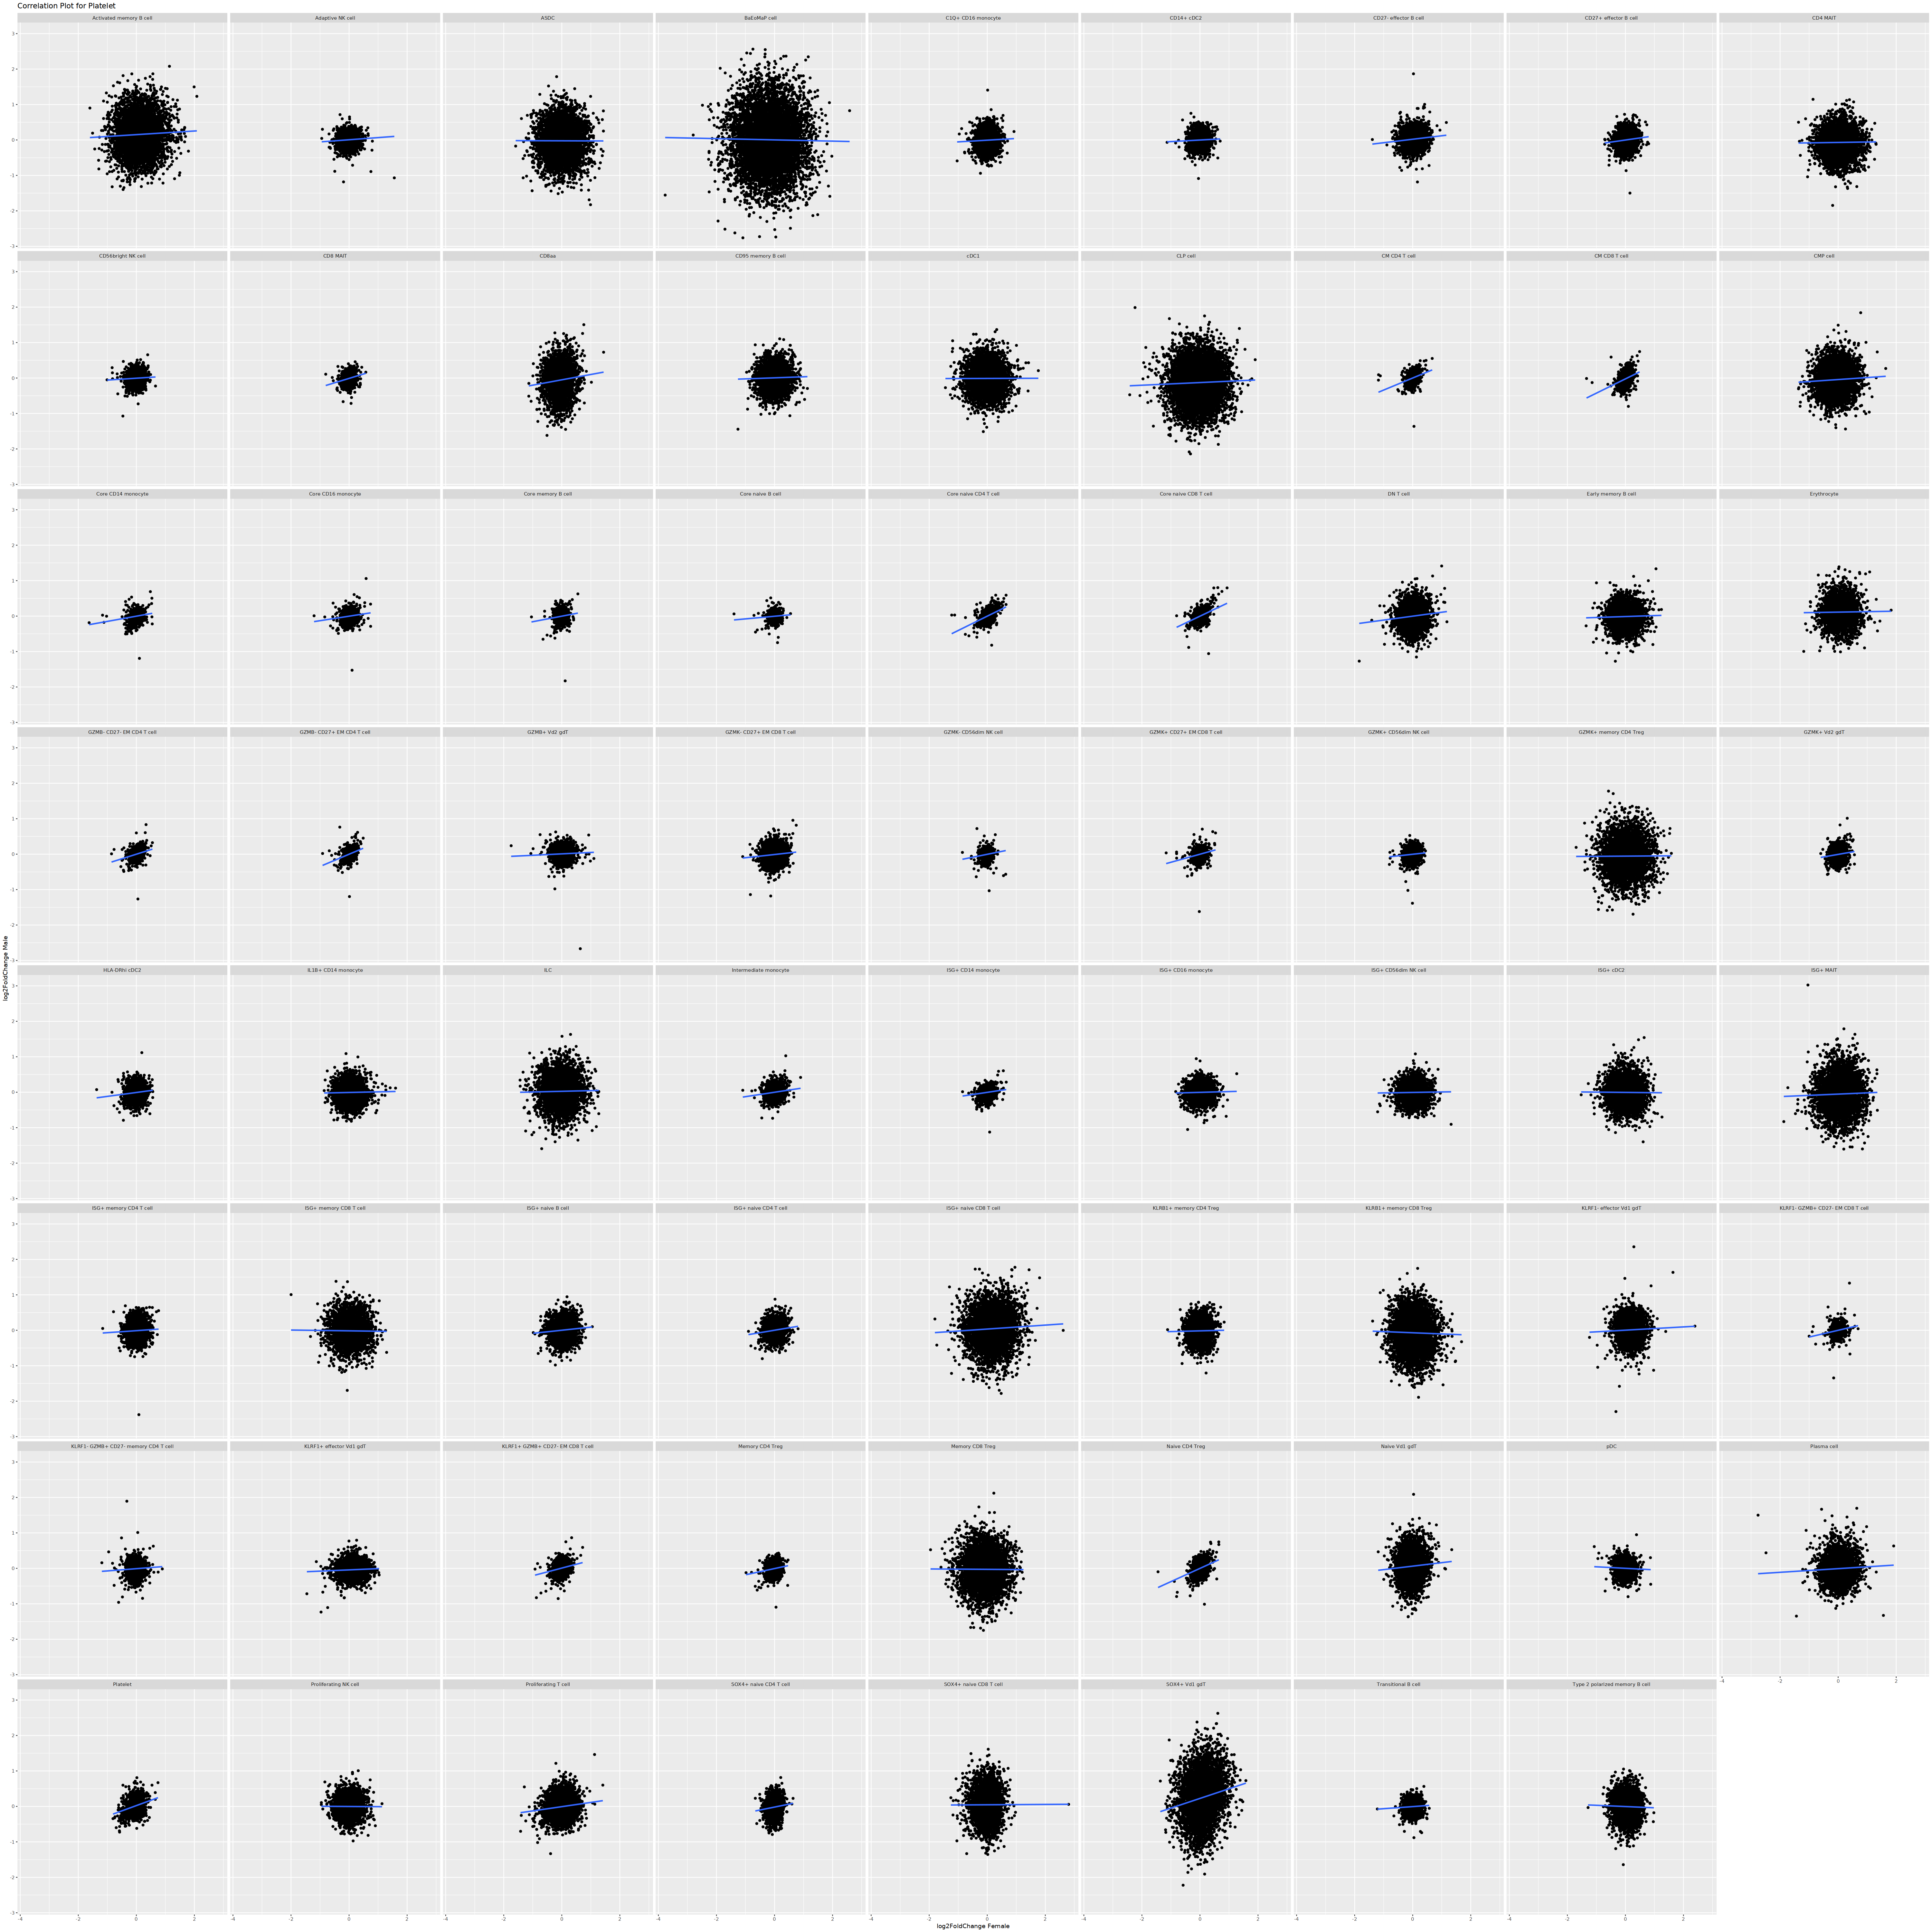

In [33]:
# celltype_filter <- merged_df %>% 
#     filter(celltype == cell) %>%
#     select(X, DEGs_Female, DEGs_Male)
options(repr.plot.width = 50, repr.plot.height =50)
    #outfile <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Correlation_plots/All_DEGs_v2/Correlation_", cell, ".pdf", sep="")  
    ggplot(data = merged_df, aes(x = Female, y = Male)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = paste("Correlation Plot for", cell),
             x = "log2FoldChange Female",
             y = "log2FoldChange Male")+
   facet_wrap(~celltype)
    
      # # Save the plot to a PDF file
      # pdf(file = outfile, width = 10, height = 10)
      #  # Print plot
      # print(correlation_plot)
      # dev.off()  

## Lolliplot graph

In [34]:
spearman_df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Spearman_correlation/Spearman_correlation_df_per_celltype.csv")

In [35]:
head(spearman_df)

X                       celltype                correlation 
1 Activated memory B cell Activated memory B cell  0.041803765
2 ASDC                    ASDC                    -0.005286007
3 BaEoMaP cell            BaEoMaP cell            -0.019590004
4 C1Q+ CD16 monocyte      C1Q+ CD16 monocyte       0.041152773
5 CD14+ cDC2              CD14+ cDC2               0.041788530
6 CD27- effector B cell   CD27- effector B cell    0.103496545

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


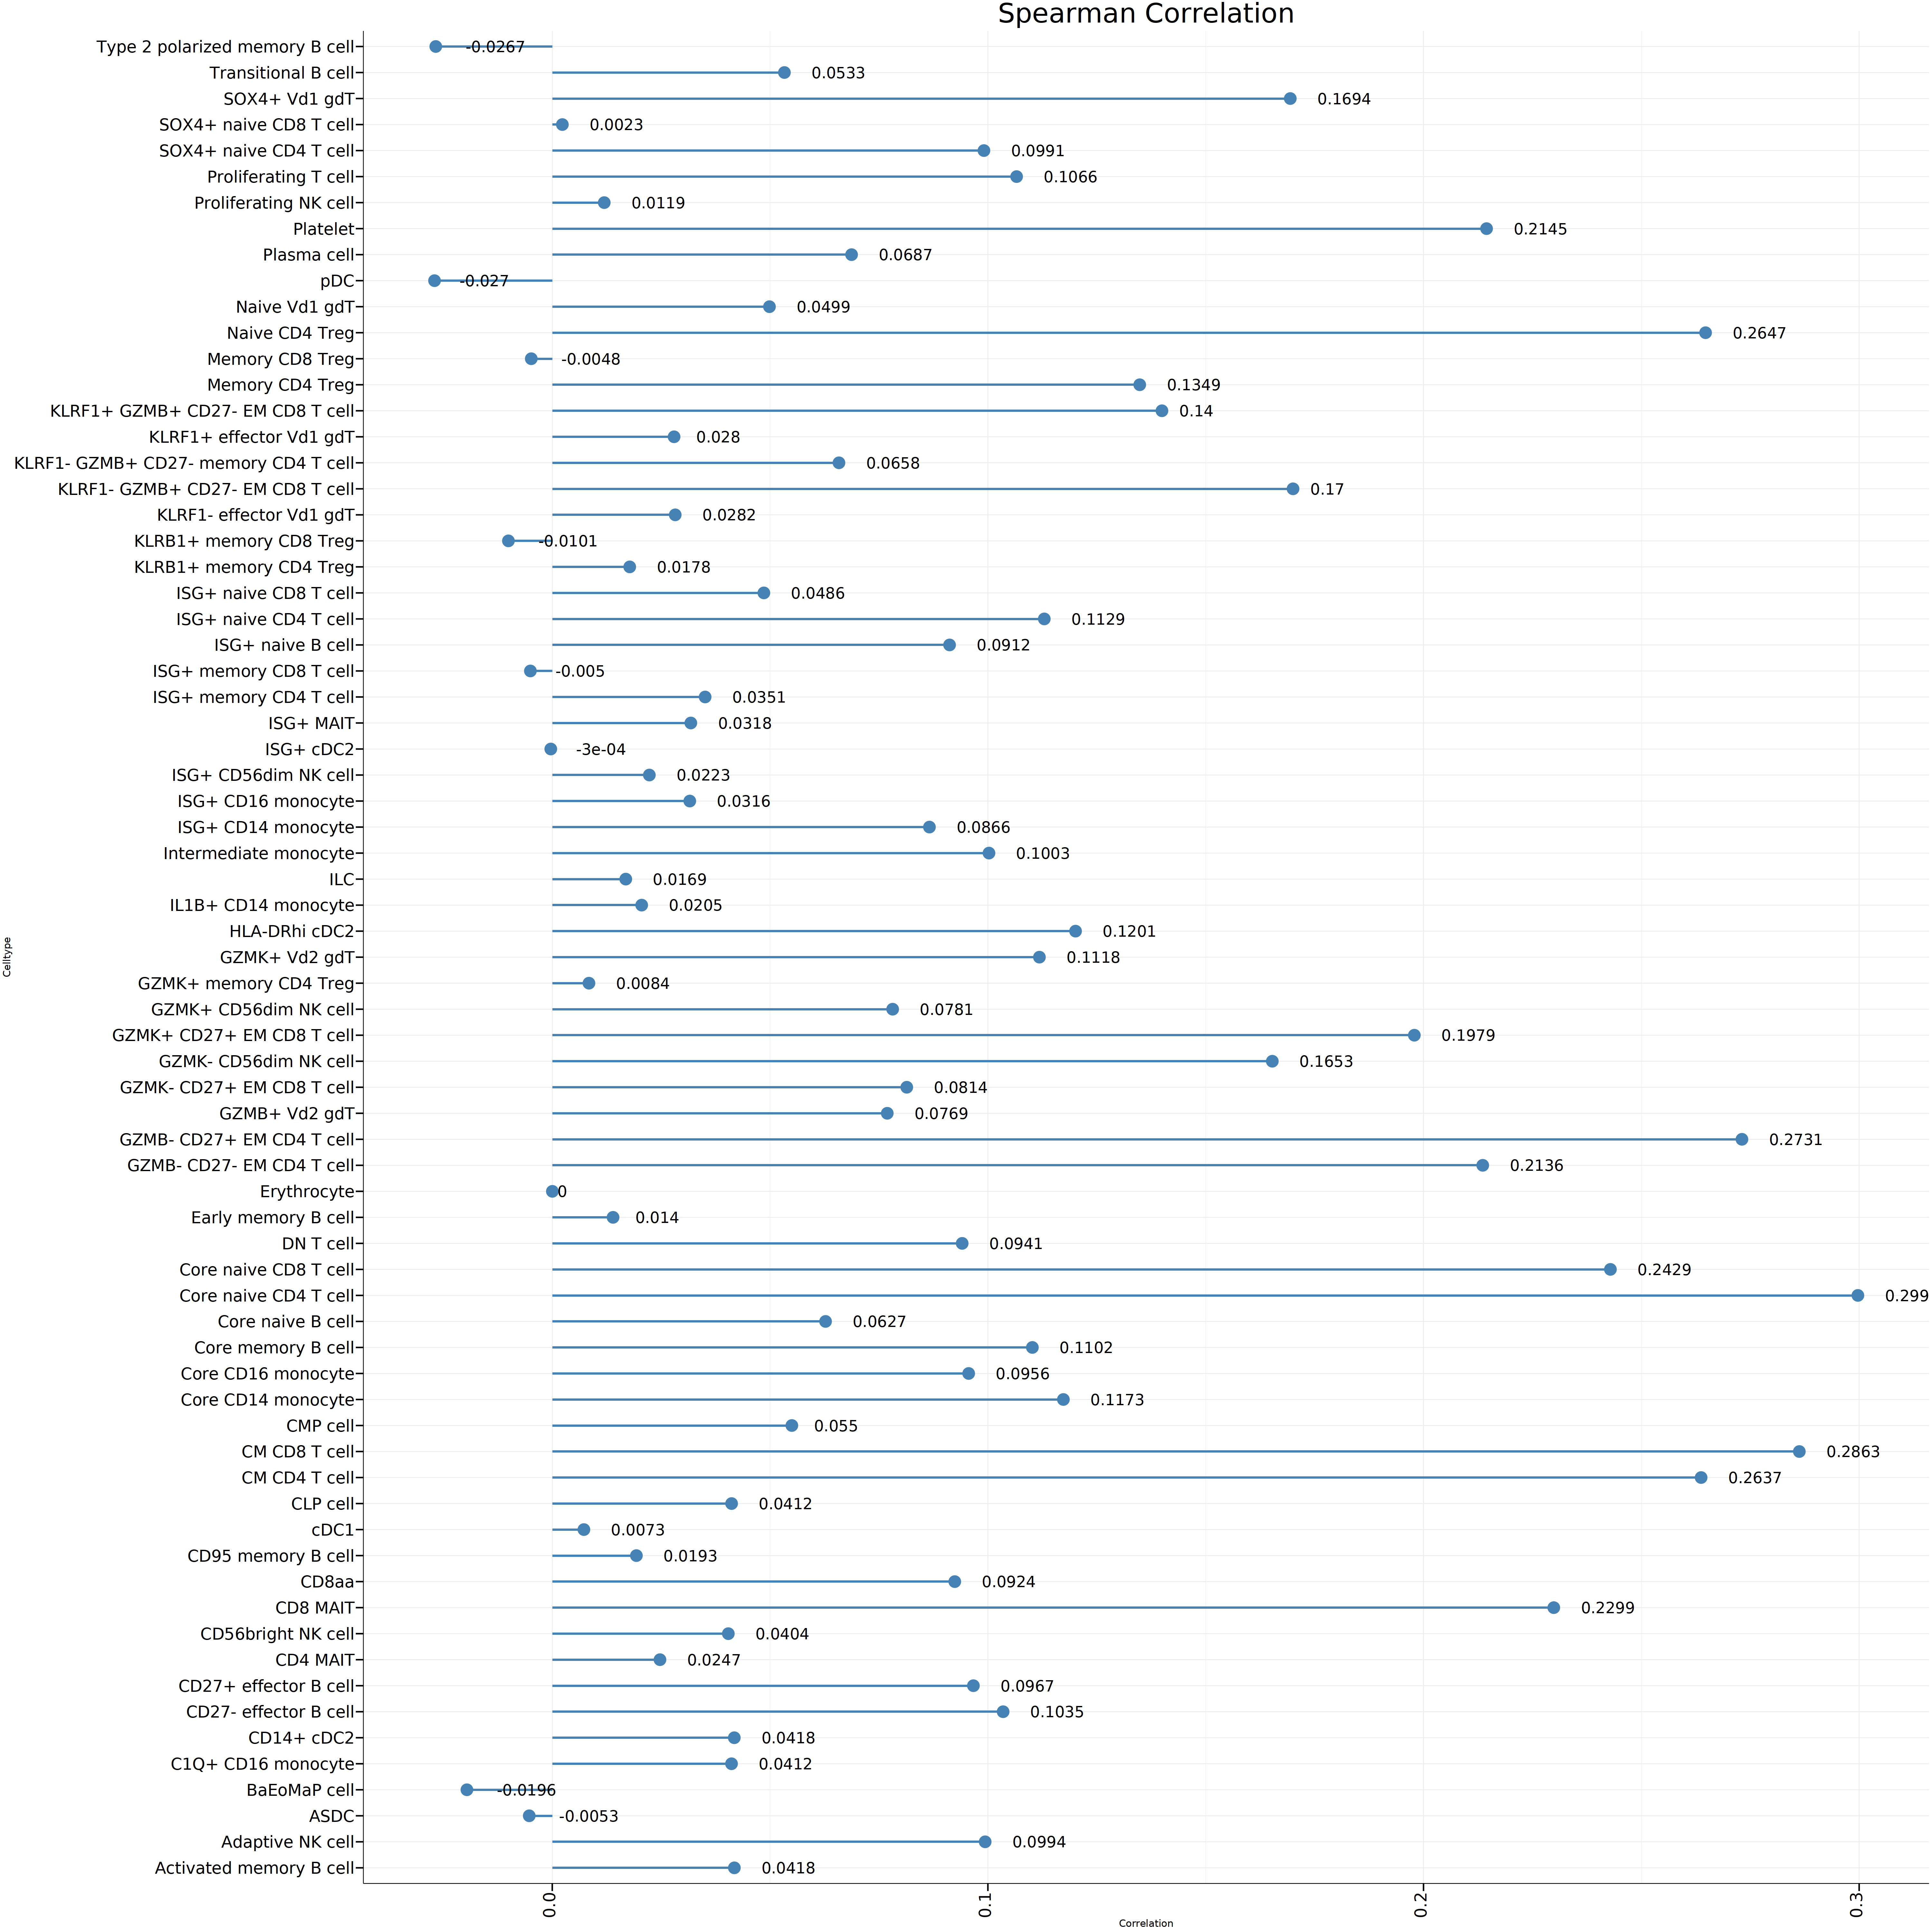

In [36]:
# Create the plot
ggplot(spearman_df, aes(x = celltype, y = correlation)) +
  geom_segment(aes(xend = celltype, yend = 0), color = "steelblue", size = 1.5) +
  geom_point(color = "steelblue", size =10) +
  geom_text(aes(label = round(correlation, 4), x = celltype, y = correlation), 
            hjust = -0.5, vjust = 0.5, size = 10, color = "black")+
  coord_flip() +  # Flip coordinates to make it vertical
  labs(x = "Celltype", y = "Correlation", title = "Spearman Correlation") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 30, angle = 90, hjust = 1, color = "black", vjust= 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 30, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1,linewidth = 1),
    axis.line = element_line(colour = "black", 
                      size = 0.5, linewidth = "solid"),# Set length of ticks
    axis.ticks.length  = unit(0.5, "cm"),
      plot.title = element_text(size = 50, hjust =0.5) 
  ) 

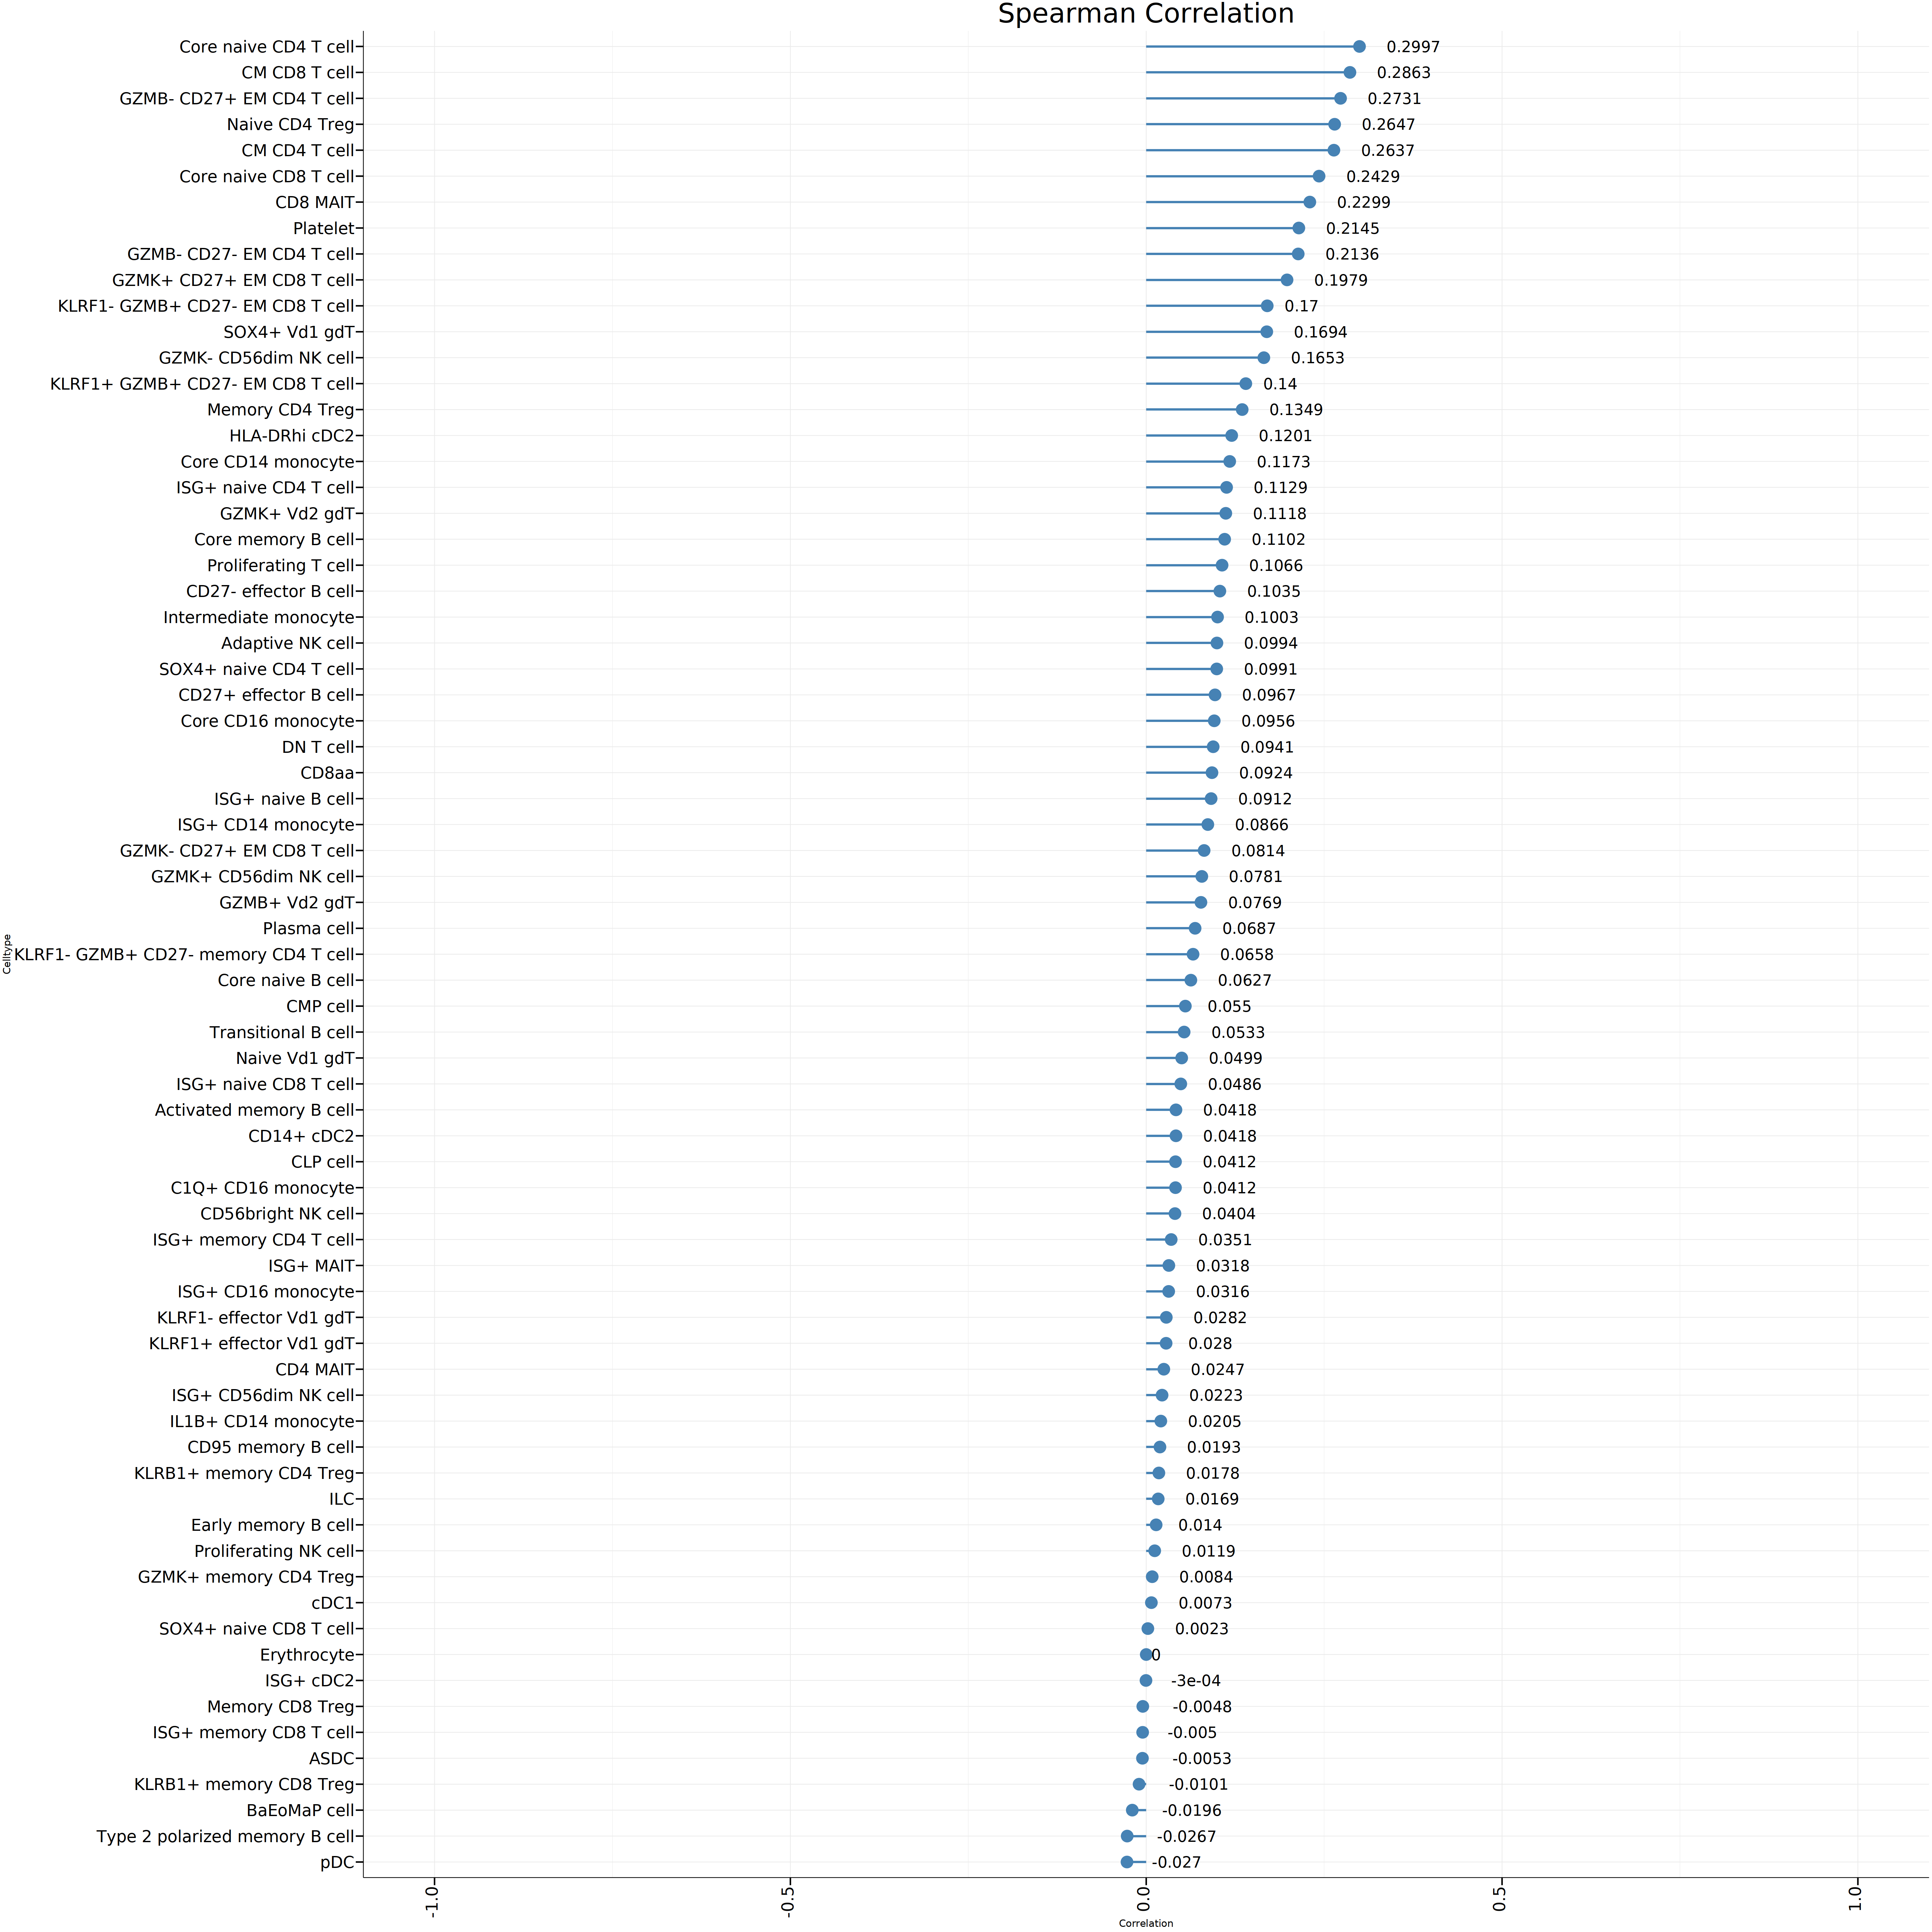

In [37]:
# Reorder levels of celltype in descending order of correlation
spearman_df$celltype <- factor(spearman_df$celltype, levels = spearman_df$celltype[order(spearman_df$correlation)])

# Plot with bars in descending order
ggplot(spearman_df, aes(x = celltype, y = correlation)) +
  geom_segment(aes(xend = celltype, yend = 0), color = "steelblue", size = 1.5) +
  geom_point(color = "steelblue", size = 10) +
  geom_text(aes(label = round(correlation, 4), x = celltype, y = correlation), 
            hjust = -0.5, vjust = 0.5, size = 10, color = "black") +
  coord_flip() +  # Flip coordinates to make it vertical
  scale_x_discrete() +  # Keep the order we set above
  scale_y_continuous(limits = c(-1, 1)) +  # Set y-axis limits
  labs(x = "Celltype", y = "Correlation", title = "Spearman Correlation") +
  theme_minimal() +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 30, angle = 90, hjust = 1, color = "black", vjust = 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 30, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1, linewidth = 1),
    axis.line = element_line(colour = "black", size = 0.5, linewidth = "solid"),  # Set length of ticks
    axis.ticks.length  = unit(0.5, "cm"),
    plot.title = element_text(size = 50, hjust = 0.5) 
  )  
 

